
 # **Introduction to PYTHON**
This document provides a short tutorial to Python. 

### **0. Setup**
For Google Colab and Kaggle. In case of Kaggle, verify that internet is activate under tabs "settings/Turn on Internet".

In [2]:
!wget https://raw.githubusercontent.com/nineil-pitt/cs1674_2074_fall25/main/lab_1_python/pittsburgh.png

--2025-08-12 10:55:05--  https://raw.githubusercontent.com/nineil-pitt/cs1674_2074_fall25/main/lab_1_python/pittsburgh.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1770126 (1.7M) [image/png]
Saving to: ‘pittsburgh.png’

pittsburgh.png      100%[===================>]   1.69M  --.-KB/s    in 0.1s    

2025-08-12 10:55:05 (16.9 MB/s) - ‘pittsburgh.png’ saved [1770126/1770126]



In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage # conda install scipy==1.9.3

### **1. Helper Functions**

In [4]:
def read_sample_im():
    im_name = 'pittsburgh.png'
    im = cv2.imread(im_name)  # Read a PNG image

    resize_percent = 0.5
    width = int(im.shape[1] * resize_percent)
    height = int(im.shape[0] * resize_percent)
    new_dim = (width, height)
    im = cv2.resize(im, new_dim, interpolation=cv2.INTER_AREA)
    return im

def fspecial_gauss(size, sigma):
    # https: // stackoverflow.com / questions / 17190649 / how - to - obtain - a - gaussian - filter - in -python
    """Function to mimic the 'fspecial' gaussian MATLAB function
    """

    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

### **2. Slide 6**

In [15]:
def filters_slide6():
    # Filters: Slide 6
    im = read_sample_im()

    # print('data type: ', im.dtype)
    # print('min: ', im.min())
    # print('max: ', im.max())
    im2 = im.astype(np.float32)  # Convert to float 32, so we can do floating operations

    # add noise
    sigma = 100
    rand_matrix = np.random.rand(*im2.shape)
    noise = rand_matrix * sigma
    im_noise = im2 + noise
    im_noise = np.where(im_noise < 0, 0, im_noise)
    im_noise = np.where(im_noise > 255, 255, im_noise)
    im_noise = im_noise.astype(np.uint8)
    
    return im, im_noise

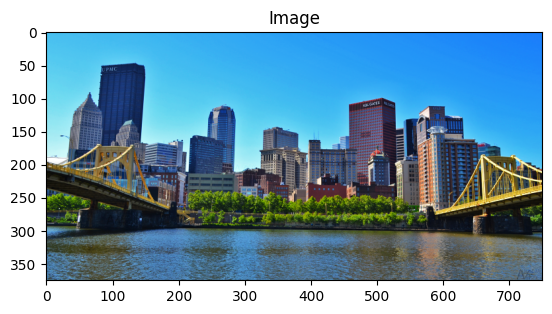

In [16]:
im, im_noise = filters_slide6()
im_2 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # For OpenCV and Jupyter notebook
plt.imshow(im_2)  # Display the image
plt.title('Image');

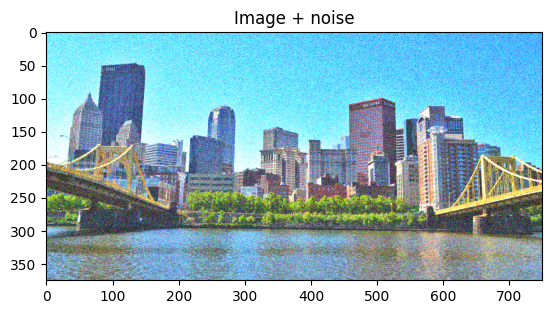

In [17]:
im_noise2 = cv2.cvtColor(im_noise, cv2.COLOR_BGR2RGB) # For OpenCV and Jupyter notebook
plt.imshow(im_noise2)
plt.title('Image + noise');


### **3.  Slide 26**

In [18]:
def filters_slide26():
    im = read_sample_im()
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # To gray scale
    hsize = 10
    sigma = 5
    filter = fspecial_gauss(hsize, sigma)

    # Filter visualization
    fig = plt.figure()
    cax = plt.matshow(filter)
    fig.colorbar(cax)
    plt.show()

    filt_im = ndimage.convolve(im, filter, mode='constant')
    
    return im, filt_im

/var/folders/_m/4w9xlkw935v9gf3p_ytnrr9h0000gn/T/ipykernel_43506/119796012.py:11: UserWarning: Adding colorbar to a different Figure <Figure size 480x480 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  fig.colorbar(cax)


<Figure size 640x480 with 0 Axes>

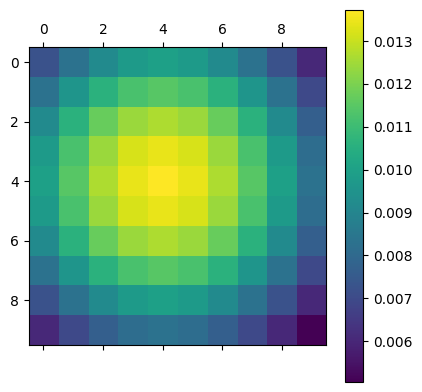

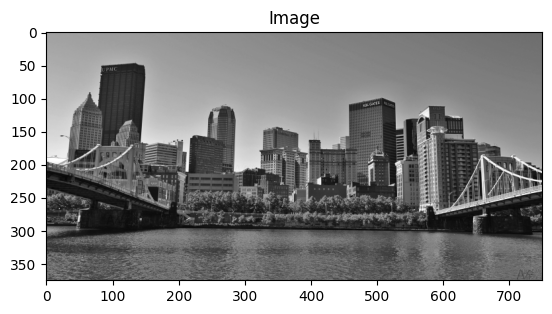

In [19]:
im, filt_im = filters_slide26()
im_2 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  # For OpenCV and Jupyter notebook
plt.imshow(im_2)
plt.title('Image');

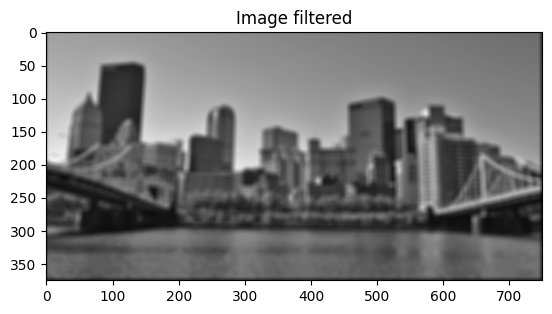

In [20]:
filt_im_2 = cv2.cvtColor(filt_im, cv2.COLOR_BGR2RGB)  # For OpenCV and Jupyter notebook
plt.imshow(filt_im_2)
plt.title('Image filtered');

### **4.  Examples**

In [32]:
def examples():
    im = read_sample_im()
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # To gray scale

    # result = ndimage.sobel(im)
    result = ndimage.gaussian_filter(im, 5)
    # result = ndimage.laplace(im)

    return im, result

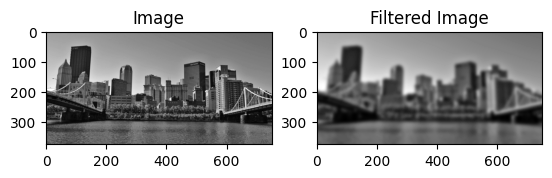

In [33]:
im, result = examples()

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(im)
ax1.set_title('Image');
ax2.imshow(result)
ax2.set_title('Filtered Image');
plt.show()